In [92]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [93]:
df = pd.read_csv("D:\\programe mania\\python\\student performence\\exam_score_predictions.csv")
df.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


In [94]:
df.isnull().sum()

Hours Studied                       0
Previous Scores                     0
Extracurricular Activities          0
Sleep Hours                         0
Sample Question Papers Practiced    0
Performance Index                   0
dtype: int64

In [95]:
for i in ["Hours Studied","Previous Scores","Extracurricular Activities","Sleep Hours","Sample Question Papers Practiced","Performance Index"]:
    print(i,":",df[i].unique())
    print("="*60)

Hours Studied : [7 4 8 5 3 6 2 1 9]
Previous Scores : [99 82 51 52 75 78 73 45 77 89 91 79 47 72 83 54 96 74 85 61 62 84 94 90
 44 70 67 97 59 55 68 63 46 76 43 81 93 98 48 92 64 88 60 87 40 69 80 95
 49 50 53 71 56 58 66 65 57 41 42 86]
Extracurricular Activities : <StringArray>
['Yes', 'No']
Length: 2, dtype: str
Sleep Hours : [9 4 7 5 8 6]
Sample Question Papers Practiced : [1 2 5 6 0 8 3 4 9 7]
Performance Index : [ 91.  65.  45.  36.  66.  61.  63.  42.  69.  84.  73.  27.  33.  68.
  43.  67.  70.  30.  71.  85.  57.  35.  49.  83.  74.  39.  58.  47.
  60.  32.  64.  54.  17.  53.  75.  52.  78.  38.  98.  87.  41.  81.
  15.  88.  95.  29.  21.  76.  25.  34.  50.  56.  82.  23.  46.  92.
  77.  86.  44.  94.  40. 100.  31.  26.  18.  51.  72.  16.  28.  89.
  48.  37.  62.  59.  19.  79.  22.  10.  90.  80.  24.  20.  96.  55.
  97.  12.  93.  14.  99.  11.  13.]


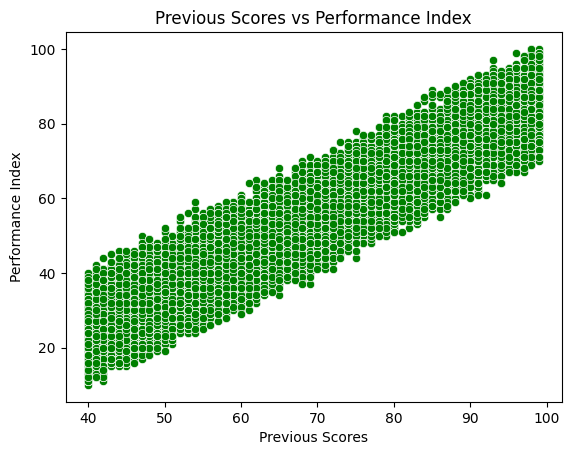

In [96]:
sns.scatterplot(x="Previous Scores",y="Performance Index",color="green",data = df)
plt.title("Previous Scores vs Performance Index")
plt.show()

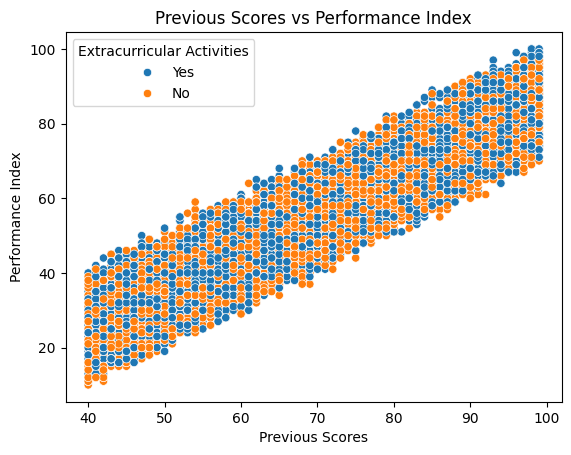

In [97]:
sns.scatterplot(x="Previous Scores",y="Performance Index",hue="Extracurricular Activities",color="green",data = df)
plt.title("Previous Scores vs Performance Index")
plt.show()

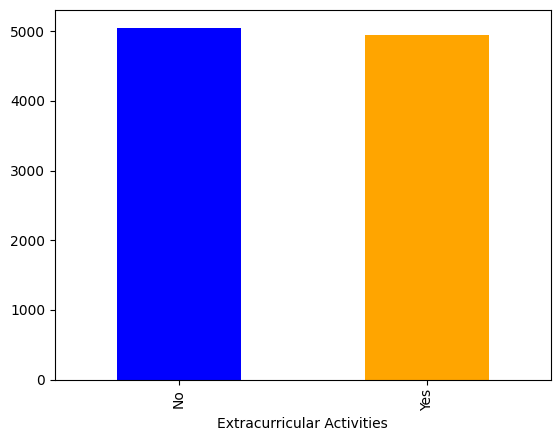

Extracurricular Activities
No     5052
Yes    4948
Name: count, dtype: int64


In [98]:
df["Extracurricular Activities"].value_counts().plot(kind="bar",color=["blue","orange"])
plt.show()
print(df["Extracurricular Activities"].value_counts())

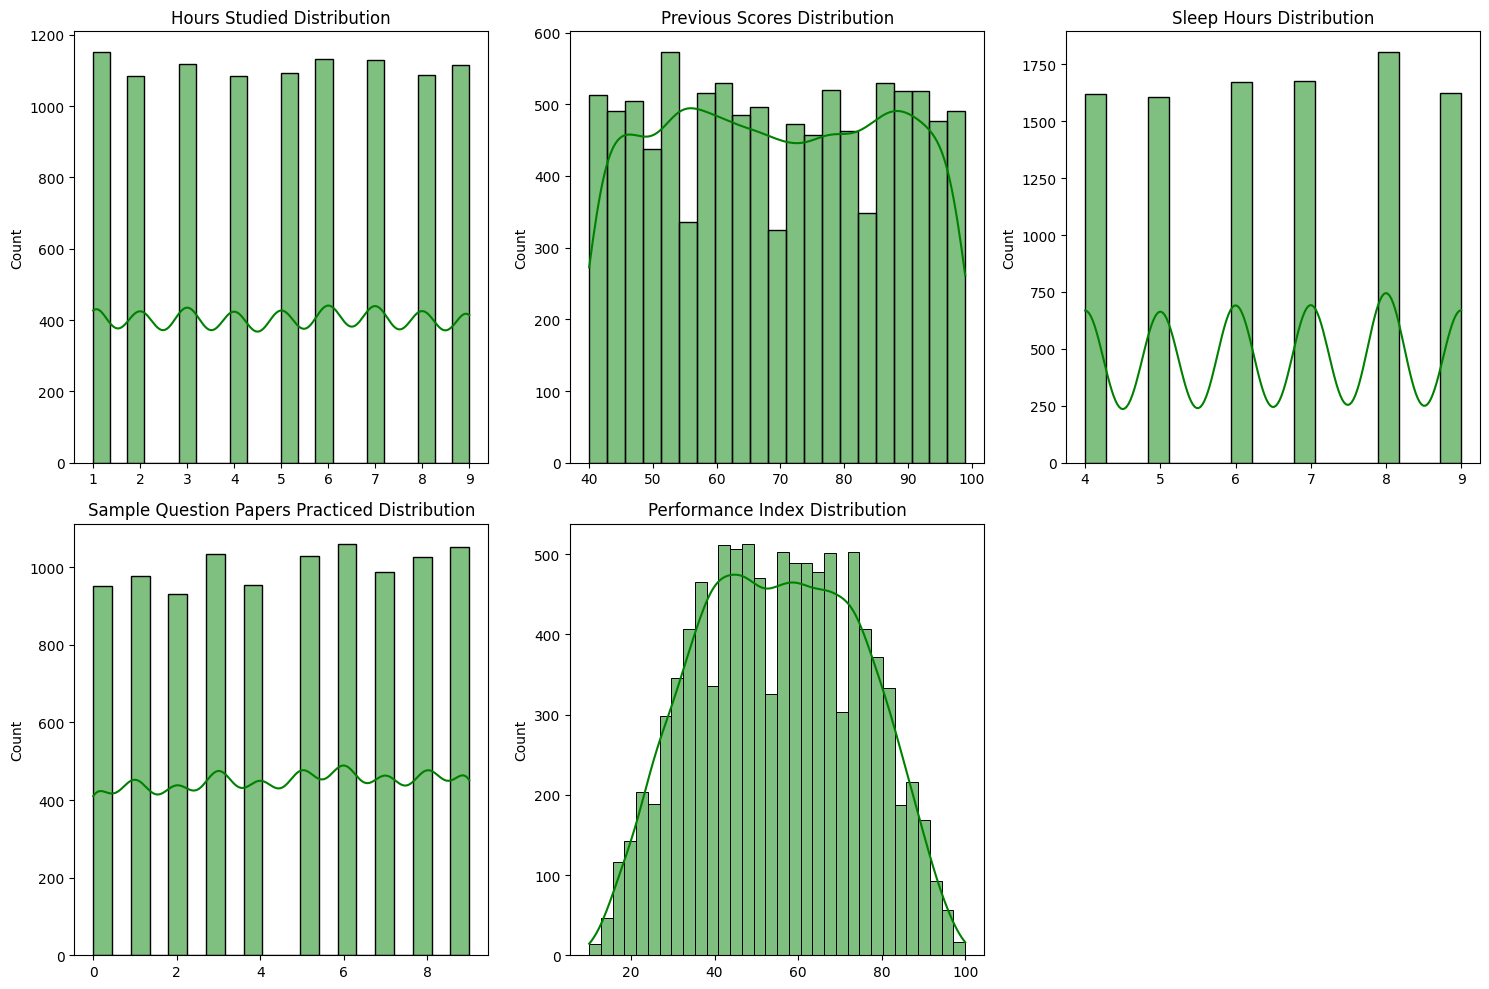

In [99]:
plt.figure(figsize=(15,10))

columns = ["Hours Studied",
           "Previous Scores",
           "Sleep Hours",
           "Sample Question Papers Practiced",
           "Performance Index"]

for idx, col in enumerate(columns, 1):
    plt.subplot(2, 3, idx)   # 2x3 grid for 6 plots
    sns.histplot(df[col], kde=True, color="green")
    plt.title(f"{col} Distribution")
    plt.xlabel("")

plt.tight_layout()
plt.show()

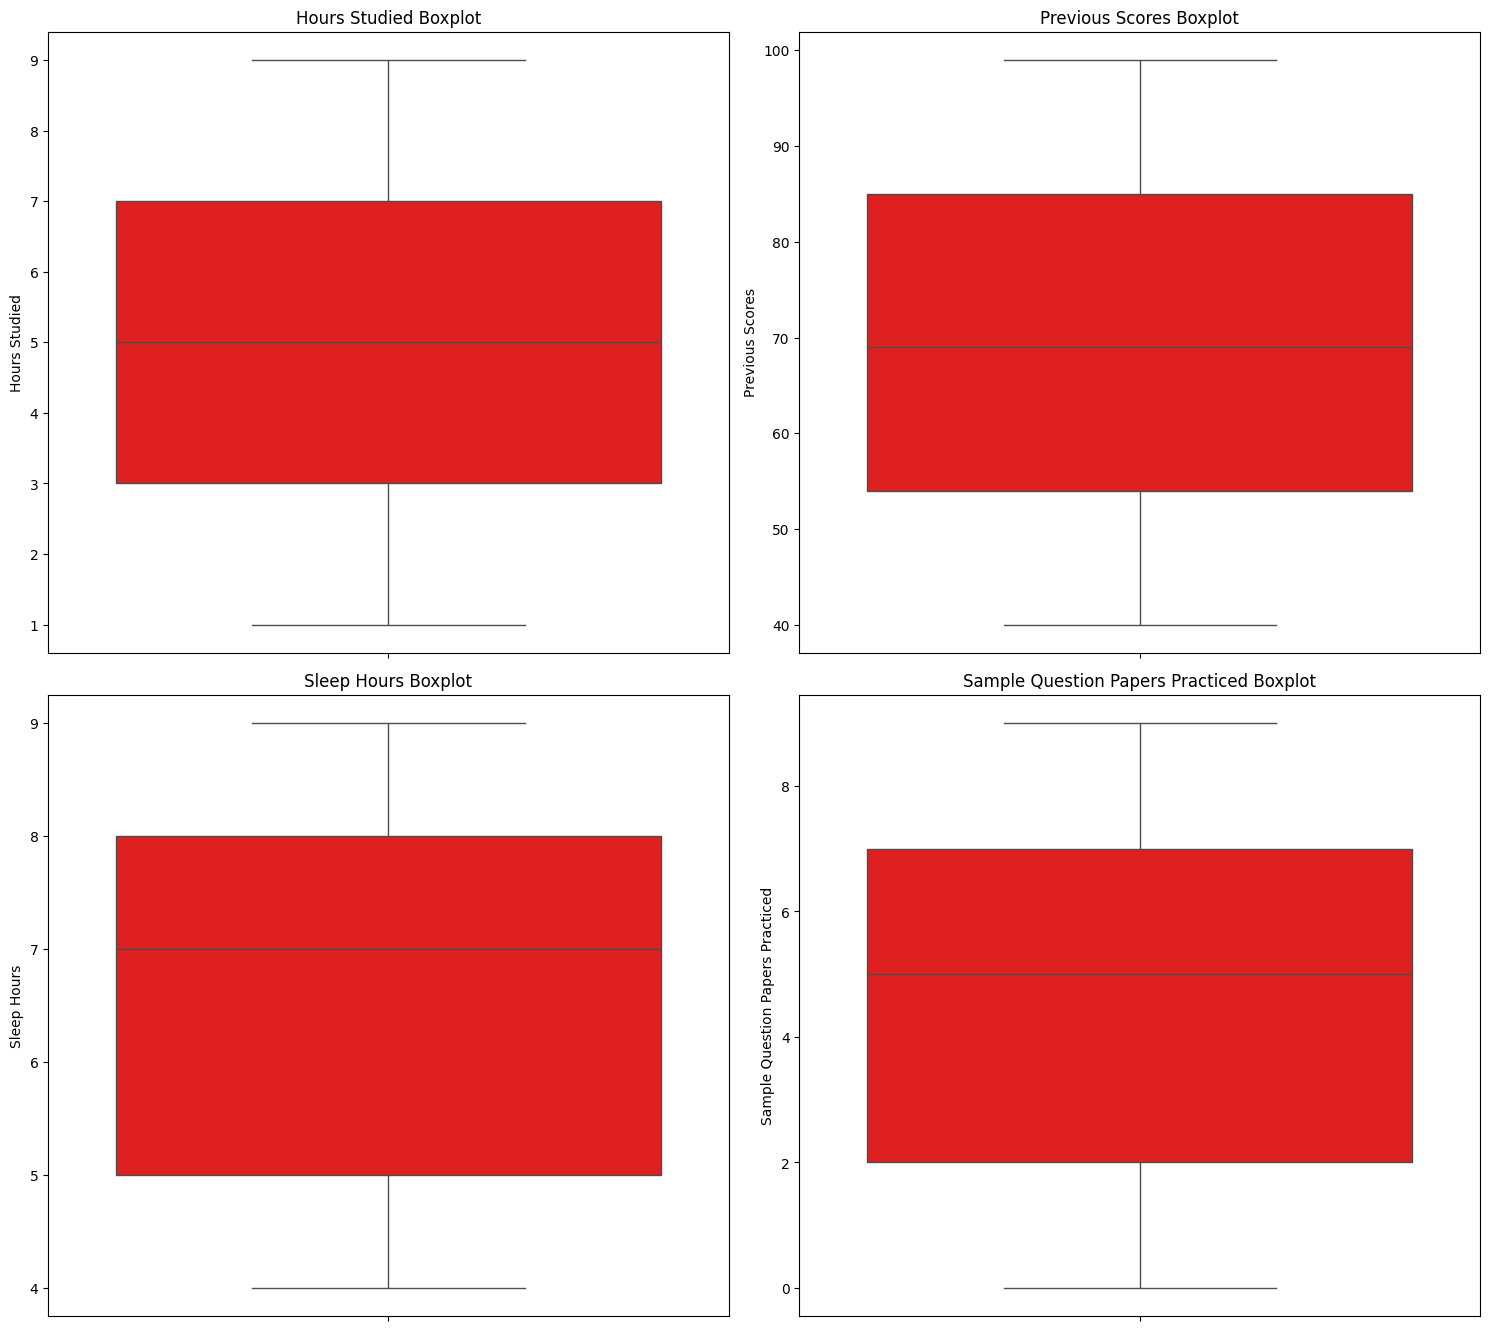

In [100]:
plt.figure(figsize=(15,20))
for i,col in enumerate(["Hours Studied","Previous Scores","Sleep Hours","Sample Question Papers Practiced"]):
    plt.subplot(3,2,i+1)
    sns.boxplot(df[col],color="red")
    plt.title(f"{col} Boxplot")
    plt.xlabel("")
plt.tight_layout()
plt.show()

In [101]:
from sklearn.model_selection import train_test_split

x = df.drop("Performance Index",axis=1)
y = df["Performance Index"]

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.25,random_state=42)
print(f"X_train shape: {x_train.shape}")
print(f"X_test shape: {x_test.shape}")
print(f"y_train shape: {y_train.shape}")


X_train shape: (7500, 5)
X_test shape: (2500, 5)
y_train shape: (7500,)


In [102]:
x_train["Extracurricular Activities"] = x_train["Extracurricular Activities"].map({"Yes":1,"No":0})
x_test["Extracurricular Activities"] = x_test["Extracurricular Activities"].map({"Yes":1,"No":0})
print(x_train["Extracurricular Activities"].unique())
print(x_test["Extracurricular Activities"].unique())

[0 1]
[0 1]


In [103]:
x_train.head()


,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced
4901,5,49,0,5,5
4375,7,88,1,4,9
6698,3,94,1,7,1
9805,9,54,1,5,9
1101,4,56,1,8,6


In [104]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso,ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error,mean_absolute_error, r2_score

In [105]:
def calculate_model_metrics(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

In [106]:
models = {
    "Linear Regression": LinearRegression(),
    "Ridge": Ridge(),
    "Lasso": Lasso(),
    "ElasticNet": ElasticNet(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree ": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor()
}

In [113]:
for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(x_train, y_train)
    
    y_test_pred = model.predict(x_test)
    y_train_pred = model.predict(x_train)
    
    model_train_mae, model_test_rmse, model_test_r2 = calculate_model_metrics(y_test, y_test_pred)
    model_test_mae, model_train_rmse, model_train_r2 = calculate_model_metrics(y_train, y_train_pred)
    
    print(f"{list(models.keys())[i]}: \nTrain MAE={model_train_mae},\n Test RMSE={model_test_rmse},\n Test R2={model_test_r2}")
    print("="*60)

Linear Regression: 
Train MAE=1.5975792091646104,
 Test RMSE=2.0081195719924434,
 Test R2=0.9890550757439104
Ridge: 
Train MAE=1.5975800205432165,
 Test RMSE=2.008123820250986,
 Test R2=0.9890550294349975
Lasso: 
Train MAE=1.735894295901938,
 Test RMSE=2.1954630374044095,
 Test R2=0.9869176464437092
ElasticNet: 
Train MAE=1.7293004357445956,
 Test RMSE=2.1911455426928965,
 Test R2=0.9869690501366244
K-Neighbors Regressor: 
Train MAE=1.9412,
 Test RMSE=2.4317006394702454,
 Test R2=0.9839507833228293
Decision Tree : 
Train MAE=2.3596666666666666,
 Test RMSE=2.9907319802646604,
 Test R2=0.9757233581187453
Random Forest Regressor: 
Train MAE=1.818381792063492,
 Test RMSE=2.275810492585673,
 Test R2=0.9859425737665338
